# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1338.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           9.65e-45
Time:                        17:43:06   Log-Likelihood:                 9.0107
No. Observations:                  50   AIC:                            -10.02
Df Residuals:                      46   BIC:                            -2.373
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8789      0.072     67.946      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.33274581  4.81665101  5.26290433  5.64612284  5.9500842   6.17039189
  6.3151976   6.40386188  6.46377329  6.52584853  6.61945291  6.7675757
  6.98305309  7.26645921  7.60601181  7.97950806  8.35797242  8.71041719
  9.00893378  9.23327792  9.37419584  9.43494453  9.43075672  9.38633812
  9.33180838  9.2977525   9.31019581  9.38632805  9.5316792   9.73921089
  9.99047276 10.25863385 10.51289082 10.72352886 10.86680374 10.92884295
 10.90792486 10.81476164 10.67073924 10.50440375 10.34677136 10.22623249
 10.16388732 10.17007908 10.24269473 10.36751205 10.5205364  10.67194288
 10.79097657 10.85100539]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.81848605 10.66137391 10.3979339  10.06978945  9.73173165  9.43830447
  9.23045051  9.12548677  9.11286493  9.15675387]


## Plot comparison

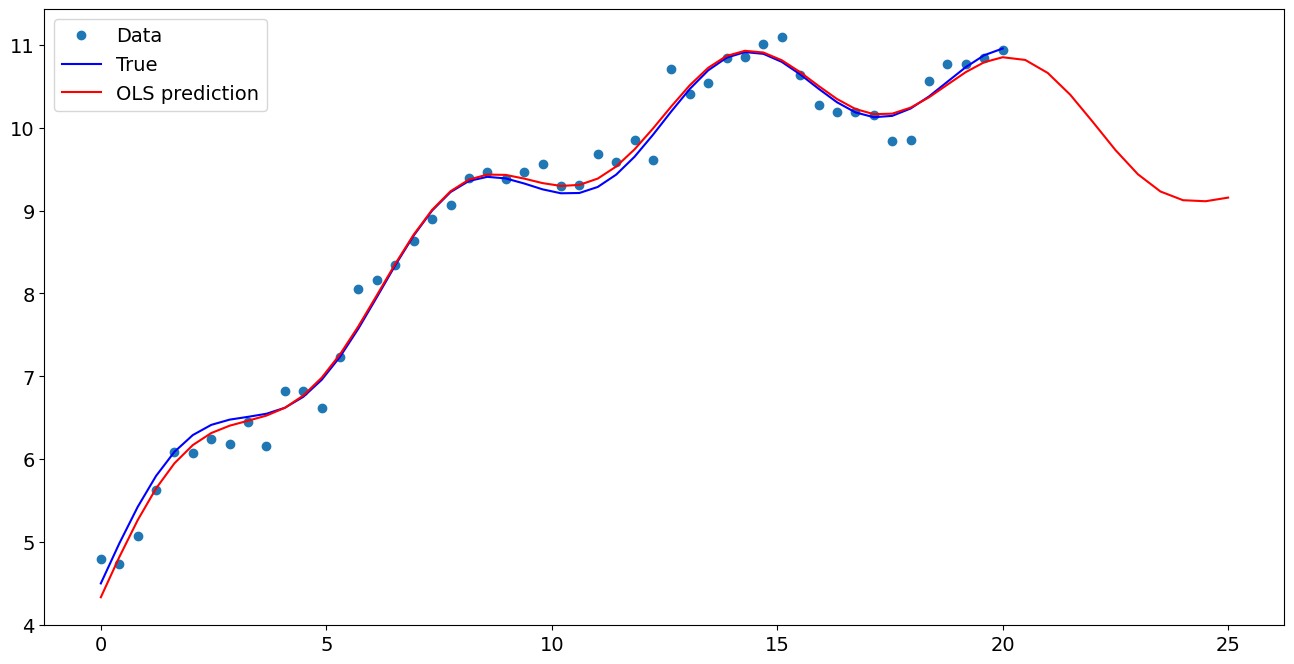

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.878880
x1                  0.523106
np.sin(x1)          0.465749
I((x1 - 5) ** 2)   -0.021845
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.818486
1    10.661374
2    10.397934
3    10.069789
4     9.731732
5     9.438304
6     9.230451
7     9.125487
8     9.112865
9     9.156754
dtype: float64